In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


In [8]:
import time as time

import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.fixes import parse_version

# these were introduced in skimage-0.14
if parse_version(skimage.__version__) >= parse_version('0.14'):
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

<ipython-input-8-7a6cee1382b2>:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [9]:
from matplotlib import image
from matplotlib import pyplot as plt

In [10]:
def load_image(name, output=False):
    img = cv2.imread(path+'/'+name+'.png')
    #img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)

    img = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img

In [12]:
img = image.imread("/content/1_Left_4.jpg")

In [13]:
# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_eyes = gaussian_filter(img, sigma=2)
rescaled_eyes = rescale(smoothened_eyes, 0.2, mode="reflect",
                         **rescale_params)

X = np.reshape(rescaled_eyes, (-1, 1))


<ipython-input-13-963f3040a91b>:5: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_eyes = rescale(smoothened_eyes, 0.2, mode="reflect",


In [14]:
X.shape

(1600, 1)

In [15]:
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*rescaled_eyes.shape)


In [16]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 10
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_eyes.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)


Compute structured hierarchical clustering...
Elapsed time:  0.09182953834533691
Number of pixels:  1600
Number of clusters:  10


In [17]:
label.shape

(40, 40, 1)

In [18]:
label2 = label.reshape(40,40)

In [19]:
label2.shape

(40, 40)

In [20]:
def show_img_by_path(display_list):
    plt.figure(figsize=(5, 5))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        img_path = path+'/'+display_list[i]+'.png'
        image = plt.imread(img_path)

        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

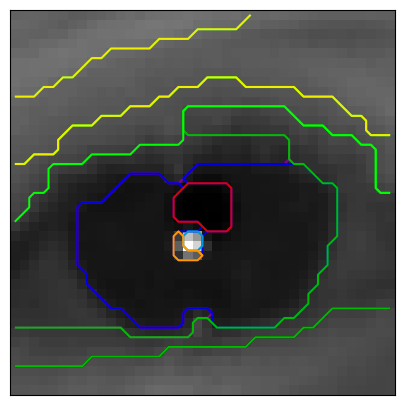

In [21]:
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(rescaled_eyes, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label2 == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

В целом неплохо, надо будет посчитать метрики. Попробуем кминс.

In [22]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# загрузка изображения глаза
#img = cv2.imread("/content/1_Left_1.png")
#img = cv2.imread("/content/1_Left_2.jpg")

In [24]:
# path
path = r'/content/1_Left_4.jpg'

# Reading an image in default mode
image = cv2.imread(path)
pathm = r'/content/1_Left_4.m.jpg'
mask =  cv2.imread(pathm)
# Window name in which image is displayed
window_name = 'image'

In [25]:
# преобразование изображения в массив пикселей
img_data = image.reshape((-1, 3))
img_data = np.float32(img_data)

# определение количества кластеров
k = 4

# создание объекта KMeans и обучение модели
kmeans = KMeans(n_clusters=k)
kmeans.fit(img_data)

# получение меток кластеров для каждого пикселя
labels = kmeans.labels_

# преобразование массива меток обратно в изображение
segmented_image = labels.reshape(img.shape[:2])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
image

array([[[89, 89, 89],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [90, 90, 90]],

       [[91, 91, 91],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [91, 91, 91]],

       [[92, 92, 92],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [71, 71, 71]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)

In [27]:
labels.shape

(40000,)

In [48]:
label2 = labels.reshape(40000, 1)

In [49]:
label2.shape

(40000, 1)

TypeError: ignored

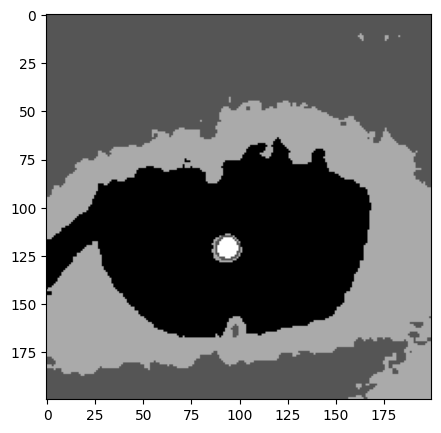

In [50]:
# отображение результатов надо будет ещё отладить
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(segmented_image, cmap=plt.cm.gray)
for l in range(k):
    plt.contour(label2 == l,
                colors=[plt.cm.nipy_spectral(l / float(k)), ])
plt.xticks(())
plt.yticks(())
plt.show()

Черновой вариант аккураси пока что для кминс

In [ ]:
def count_accuracy_(result, mask):
    metrics_iou = []
    for i in np.unique(result.flatten()):
        result_copy = result.copy()
        result_copy[abs(result_copy - i) < 0.0001] = 1
        result_copy[result_copy != 1] = 0
        metrics_iou.append(np.array(result_copy, mask).max())
    accuracy, cluster_ind = np.array(result).max(), np.argmax(np.array(mask))
    #print('---', cluster_ind, np.unique(result.flatten())[cluster_ind])
    return accuracy, slice_

In [53]:
result = segmented_image
result_labels = label2

accuracy, slice_ = count_accuracy_(result_labels, mask)
print(f'{0+1}. accuracy =', accuracy)

1. accuracy = 0.1876616822429906
